In [2]:
!pip install ucimlrepo hmmlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.9/165.9 kB 3.4 MB/s eta 0:00:0000:01


In [209]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, learning_curve
from hmmlearn import hmm
from tqdm import tqdm
from IPython.display import display

# **IONOSPHERE DATASET**

In [225]:
from ucimlrepo import fetch_ucirepo 
  
ionosphere = fetch_ucirepo(id=52)
X = ionosphere.data.features
y = ionosphere.data.targets
  
X.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute25,Attribute26,Attribute27,Attribute28,Attribute29,Attribute30,Attribute31,Attribute32,Attribute33,Attribute34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697


In [186]:
X.columns

Index(['Attribute1', 'Attribute2', 'Attribute3', 'Attribute4', 'Attribute5',
       'Attribute6', 'Attribute7', 'Attribute8', 'Attribute9', 'Attribute10',
       'Attribute11', 'Attribute12', 'Attribute13', 'Attribute14',
       'Attribute15', 'Attribute16', 'Attribute17', 'Attribute18',
       'Attribute19', 'Attribute20', 'Attribute21', 'Attribute22',
       'Attribute23', 'Attribute24', 'Attribute25', 'Attribute26',
       'Attribute27', 'Attribute28', 'Attribute29', 'Attribute30',
       'Attribute31', 'Attribute32', 'Attribute33', 'Attribute34'],
      dtype='object')

In [184]:
y['Class'].unique()

array(['g', 'b'], dtype=object)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [121]:
classifier = hmm.GaussianHMM(n_components=2, covariance_type="full", algorithm="viterbi" n_iter=1000, random_state=22)

classifier.fit(X_train)

y_pred = classifier.predict(X_test)

y_test_enc = y_test['Class'].map({'g': 0, 'b': 1})

print("Confusion Matrix:")
print(confusion_matrix(y_test_enc, y_pred))

print("--------------------------------------------------")
print("Performance Evaluation:")
print(classification_report(y_test_enc, y_pred))

Confusion Matrix:
[[39  5]
 [ 3 24]]
--------------------------------------------------
Performance Evaluation:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        44
           1       0.83      0.89      0.86        27

    accuracy                           0.89        71
   macro avg       0.88      0.89      0.88        71
weighted avg       0.89      0.89      0.89        71




=== Train-Test Split: 50:50 ===
Best Parameters: {'algorithm': 'viterbi', 'covariance_type': 'diag', 'n_iter': 500}
              precision    recall  f1-score   support

           0       0.90      0.50      0.65       113
           1       0.50      0.90      0.65        63

    accuracy                           0.65       176
   macro avg       0.70      0.70      0.65       176
weighted avg       0.76      0.65      0.65       176



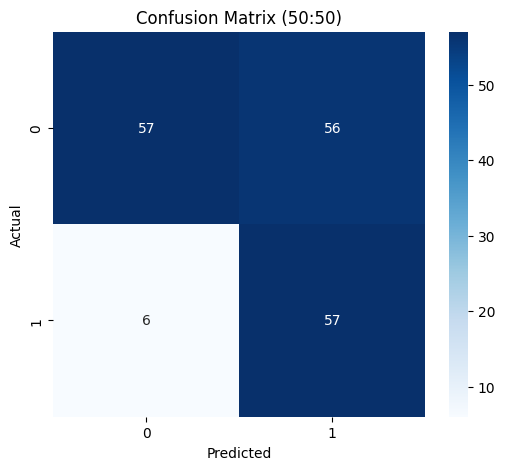

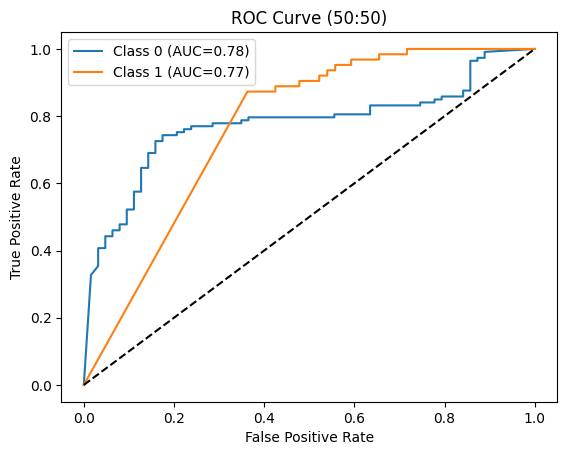


=== Train-Test Split: 60:40 ===
Best Parameters: {'algorithm': 'viterbi', 'covariance_type': 'diag', 'n_iter': 500}
              precision    recall  f1-score   support

           0       0.94      0.71      0.81        90
           1       0.64      0.92      0.76        51

    accuracy                           0.79       141
   macro avg       0.79      0.82      0.78       141
weighted avg       0.83      0.79      0.79       141



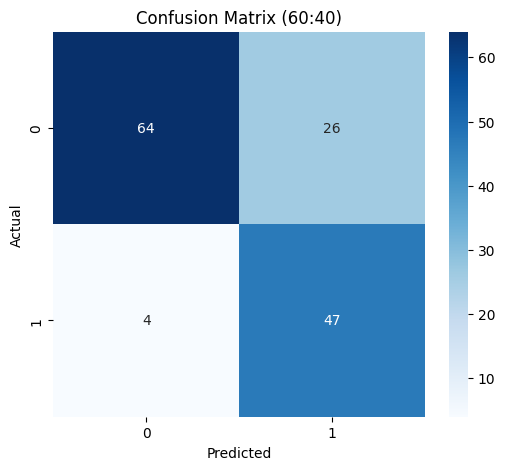

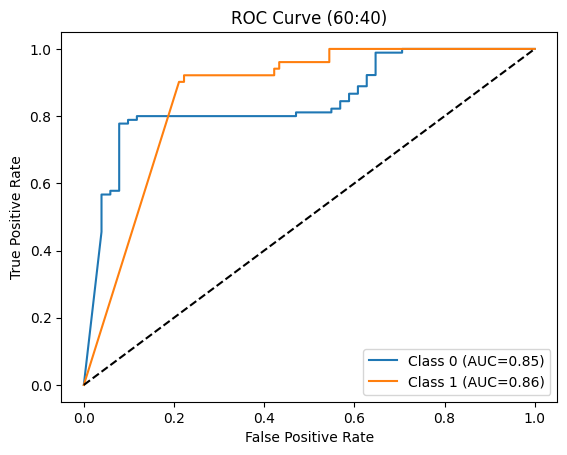


=== Train-Test Split: 70:30 ===
Best Parameters: {'algorithm': 'viterbi', 'covariance_type': 'diag', 'n_iter': 500}
              precision    recall  f1-score   support

           0       0.43      0.38      0.40        68
           1       0.07      0.08      0.07        38

    accuracy                           0.27       106
   macro avg       0.25      0.23      0.24       106
weighted avg       0.30      0.27      0.28       106



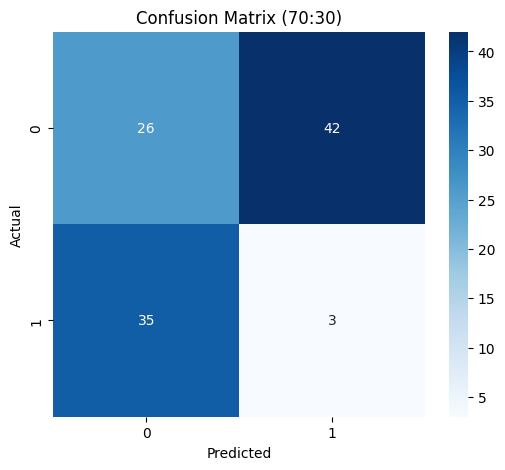

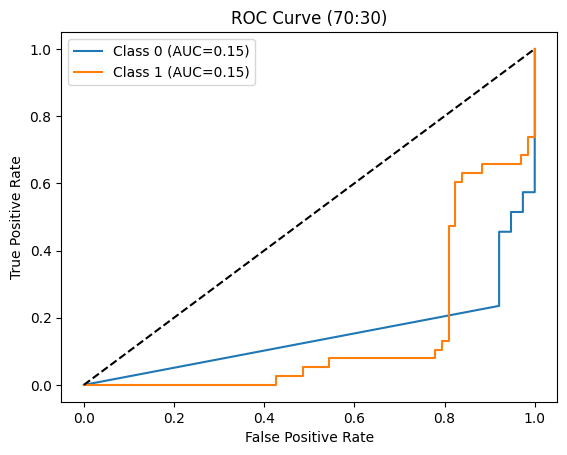


=== Train-Test Split: 80:20 ===
Best Parameters: {'algorithm': 'viterbi', 'covariance_type': 'diag', 'n_iter': 500}
              precision    recall  f1-score   support

           0       0.97      0.76      0.85        46
           1       0.69      0.96      0.80        25

    accuracy                           0.83        71
   macro avg       0.83      0.86      0.83        71
weighted avg       0.87      0.83      0.83        71



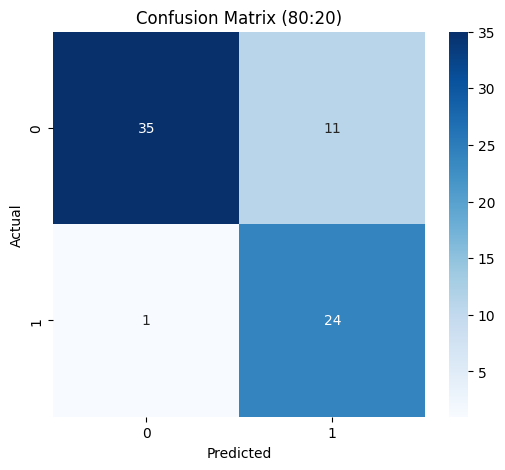

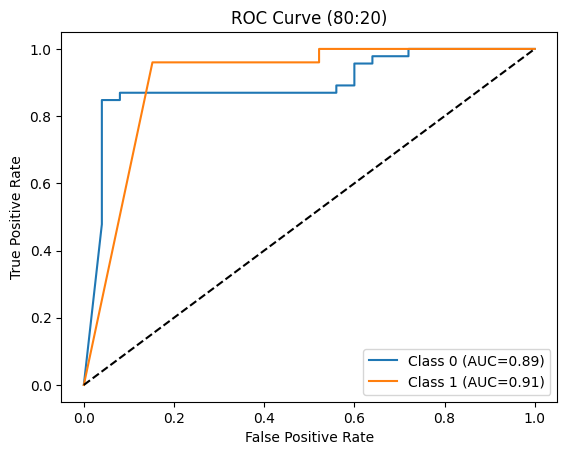

,Test Size,Accuracy,Precision,Recall,F1
0,0.5,0.647727,0.761459,0.647727,0.647727
1,0.4,0.787234,0.833628,0.787234,0.791296
2,0.3,0.273585,0.297330,0.273585,0.284508
3,0.2,0.830986,0.871339,0.830986,0.834765


In [191]:
splits = [0.5, 0.4, 0.3, 0.2]
results = []

for test_size in splits:
    print(f"\n=== Train-Test Split: {int((1-test_size)*100)}:{int(test_size*100)} ===")

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42, stratify=y
    )

    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    # Train
    classifier = hmm.GaussianHMM(n_components=2, random_state=22)

    param_grid = {
        'covariance_type': ['spherical', 'diag', 'full', 'tied'],
        'algorithm': ['viterbi', 'map'],
        'n_iter': [500, 1000, 5000]
    }

    grid = GridSearchCV(classifier, param_grid, cv=5)
    grid.fit(X_train)

    best_model = grid.best_estimator_
    print("Best Parameters:", grid.best_params_)

    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)

    y_test_enc = y_test['Class'].map({'g': 0, 'b': 1})

    # Metrics
    acc = accuracy_score(y_test_enc, y_pred)
    prec = precision_score(y_test_enc, y_pred, average="weighted")
    rec = recall_score(y_test_enc, y_pred, average="weighted")
    f1 = f1_score(y_test_enc, y_pred, average="weighted")
    results.append([test_size, acc, prec, rec, f1])

    print(classification_report(y_test_enc, y_pred))

    # Confusion Matrix Heatmap
    plt.figure(figsize=(6,5))
    sns.heatmap(confusion_matrix(y_test_enc, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix ({int((1-test_size)*100)}:{int(test_size*100)})")
    plt.xlabel("Predicted"); plt.ylabel("Actual")
    plt.show()

    # # Learning Curve
    # train_sizes, train_scores, test_scores = learning_curve(
    #     classifier, X_train, y_train, cv=5, n_jobs=-1,
    #     train_sizes=np.linspace(0.1, 1.0, 10)
    # )
    # plt.figure()
    # plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Train Score")
    # plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Cross-val Score")
    # plt.title(f"Learning Curve ({int((1-test_size)*100)}:{int(test_size*100)})")
    # plt.xlabel("Training examples"); plt.ylabel("Accuracy")
    # plt.legend(); plt.show()

    # ROC Curve
    fpr, tpr, roc_auc = {}, {}, {}
    for i, cls in [(0,0), (1,1)]:
        fpr[i], tpr[i], _ = roc_curve(y_test_enc == cls, y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    for i, cls in [(0,0), (1,1)]:
        plt.plot(fpr[i], tpr[i], label=f"Class {cls} (AUC={roc_auc[i]:.2f})")
    plt.plot([0,1],[0,1],"k--")
    plt.title(f"ROC Curve ({int((1-test_size)*100)}:{int(test_size*100)})")
    plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
    plt.legend(); plt.show()

results_df = pd.DataFrame(results, columns=["Test Size", "Accuracy", "Precision", "Recall", "F1"])
display(results_df)

In [135]:
classifier = hmm.GMMHMM(n_components=2, n_iter=1000, random_state=42)

classifier.fit(X_train)

y_pred = classifier.predict(X_test)

y_test_enc = y_test['Class'].map({'g': 0, 'b': 1})

print("Confusion Matrix:")
print(confusion_matrix(y_test_enc, y_pred))

print("--------------------------------------------------")
print("Performance Evaluation:")
print(classification_report(y_test_enc, y_pred))

Confusion Matrix:
[[44  0]
 [20  7]]
--------------------------------------------------
Performance Evaluation:
              precision    recall  f1-score   support

           0       0.69      1.00      0.81        44
           1       1.00      0.26      0.41        27

    accuracy                           0.72        71
   macro avg       0.84      0.63      0.61        71
weighted avg       0.81      0.72      0.66        71



In [226]:
X_mean = np.mean(X, axis=0)
X_mean

Attribute1     0.891738
Attribute2     0.000000
Attribute3     0.641342
Attribute4     0.044372
Attribute5     0.601068
Attribute6     0.115889
Attribute7     0.550095
Attribute8     0.119360
Attribute9     0.511848
Attribute10    0.181345
Attribute11    0.476183
Attribute12    0.155040
Attribute13    0.400801
Attribute14    0.093414
Attribute15    0.344159
Attribute16    0.071132
Attribute17    0.381949
Attribute18   -0.003617
Attribute19    0.359390
Attribute20   -0.024025
Attribute21    0.336695
Attribute22    0.008296
Attribute23    0.362475
Attribute24   -0.057406
Attribute25    0.396135
Attribute26   -0.071187
Attribute27    0.541641
Attribute28   -0.069538
Attribute29    0.378445
Attribute30   -0.027907
Attribute31    0.352514
Attribute32   -0.003794
Attribute33    0.349364
Attribute34    0.014480
dtype: float64

In [227]:
X1 = X > X_mean
X2 = X1.astype(int)

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.20)

In [232]:
classifier = hmm.MultinomialHMM(n_components=2, algorithm="viterbi", n_iter=1000, random_state=42)

classifier.fit(X_train)

y_pred = classifier.predict(X_test)

y_test_enc = y_test['Class'].map({'g': 0, 'b': 1})

print("Confusion Matrix:")
print(confusion_matrix(y_test_enc, y_pred))

print("--------------------------------------------------")
print("Performance Evaluation:")
print(classification_report(y_test_enc, y_pred))

Confusion Matrix:
[[28 16]
 [16 11]]
--------------------------------------------------
Performance Evaluation:
              precision    recall  f1-score   support

           0       0.64      0.64      0.64        44
           1       0.41      0.41      0.41        27

    accuracy                           0.55        71
   macro avg       0.52      0.52      0.52        71
weighted avg       0.55      0.55      0.55        71



# **WINCONSIN BREAST CANCER DATASET**

In [199]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

X = data.data
y = data.target

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [211]:
msc = MinMaxScaler()
X_train = msc.fit_transform(X_train)
X_test = msc.transform(X_test)

In [197]:
classifier = hmm.GaussianHMM(n_components=2, covariance_type="full", algorithm="viterbi", n_iter=1000, random_state=22)

classifier.fit(X_train)

y_pred = classifier.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("--------------------------------------------------")
print("Performance Evaluation:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[38  1]
 [ 4 71]]
--------------------------------------------------
Performance Evaluation:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94        39
           1       0.99      0.95      0.97        75

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114




=== Train-Test Split: 50:50 ===
Best Parameters: {'algorithm': 'viterbi', 'covariance_type': 'full', 'n_iter': 500}
              precision    recall  f1-score   support

           0       0.79      0.95      0.86       106
           1       0.97      0.85      0.90       179

    accuracy                           0.89       285
   macro avg       0.88      0.90      0.88       285
weighted avg       0.90      0.89      0.89       285



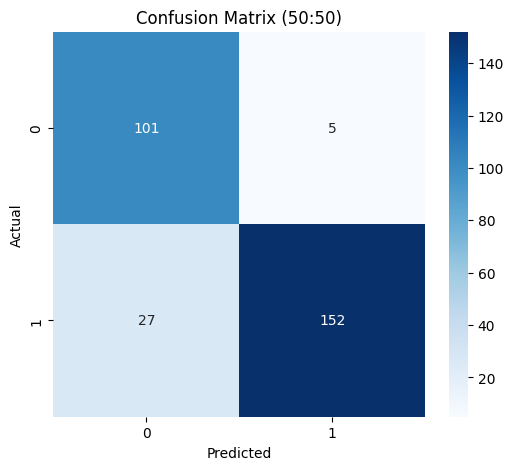

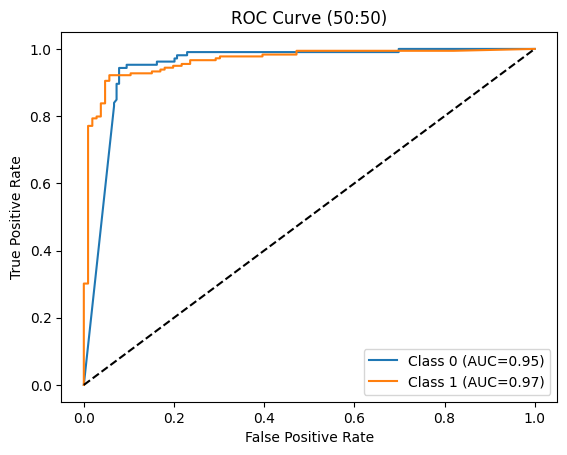


=== Train-Test Split: 60:40 ===
Best Parameters: {'algorithm': 'viterbi', 'covariance_type': 'full', 'n_iter': 500}
              precision    recall  f1-score   support

           0       0.82      0.96      0.89        85
           1       0.98      0.87      0.92       143

    accuracy                           0.91       228
   macro avg       0.90      0.92      0.90       228
weighted avg       0.92      0.91      0.91       228



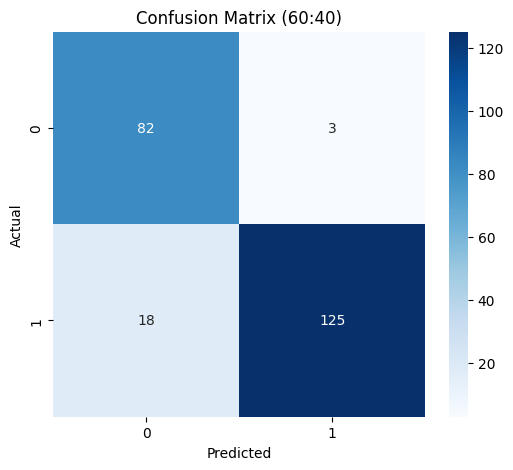

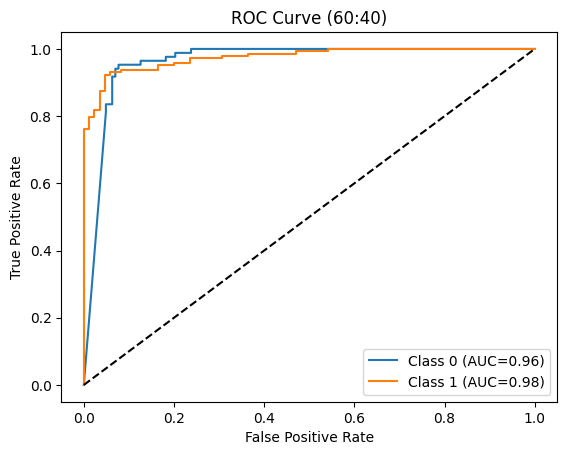


=== Train-Test Split: 70:30 ===
Best Parameters: {'algorithm': 'viterbi', 'covariance_type': 'full', 'n_iter': 500}
              precision    recall  f1-score   support

           0       0.05      0.08      0.06        64
           1       0.17      0.11      0.13       107

    accuracy                           0.10       171
   macro avg       0.11      0.10      0.10       171
weighted avg       0.12      0.10      0.11       171



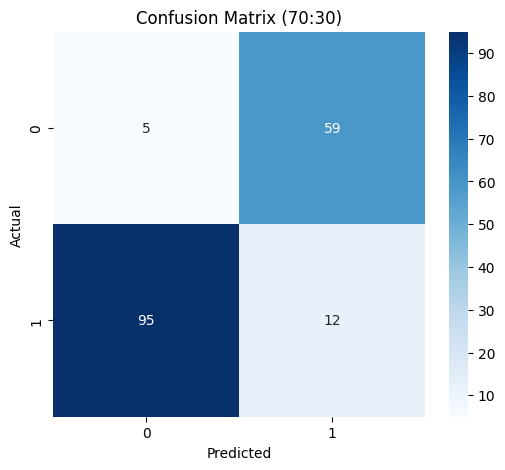

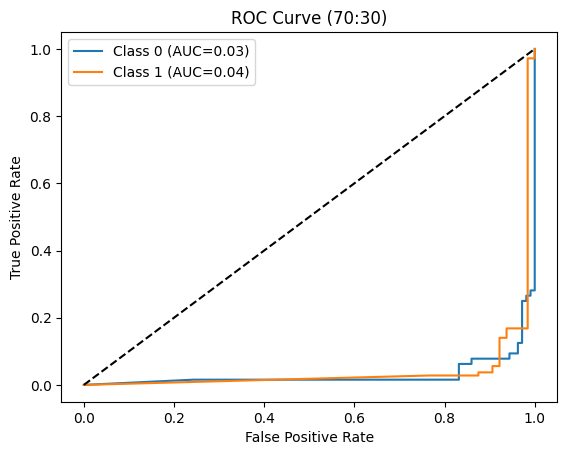


=== Train-Test Split: 80:20 ===
Best Parameters: {'algorithm': 'viterbi', 'covariance_type': 'full', 'n_iter': 500}
              precision    recall  f1-score   support

           0       0.82      0.95      0.88        42
           1       0.97      0.88      0.92        72

    accuracy                           0.90       114
   macro avg       0.89      0.91      0.90       114
weighted avg       0.91      0.90      0.90       114



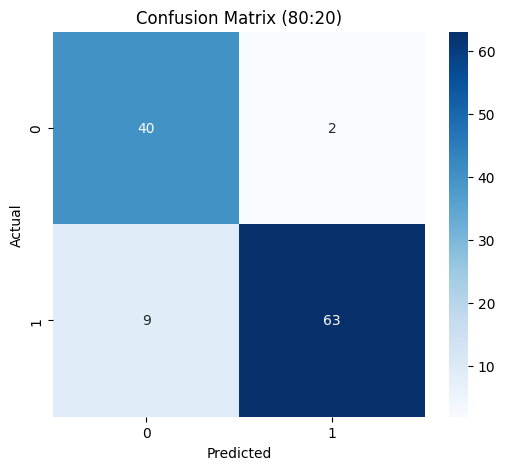

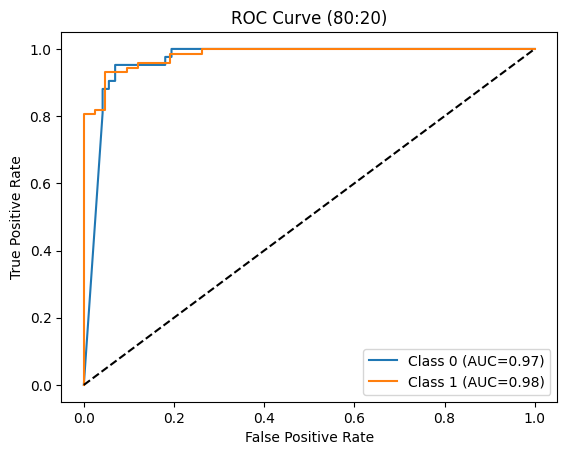

,Test Size,Accuracy,Precision,Recall,F1
0,0.5,0.887719,0.901544,0.887719,0.889322
1,0.4,0.907895,0.918195,0.907895,0.909080
2,0.3,0.099415,0.124471,0.099415,0.107190
3,0.2,0.903509,0.912898,0.903509,0.904755


In [198]:
splits = [0.5, 0.4, 0.3, 0.2]
results = []

for test_size in splits:
    print(f"\n=== Train-Test Split: {int((1-test_size)*100)}:{int(test_size*100)} ===")

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42, stratify=y
    )

    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    # Train
    classifier = hmm.GaussianHMM(n_components=2, random_state=22)

    param_grid = {
        'covariance_type': ['spherical', 'diag', 'full', 'tied'],
        'algorithm': ['viterbi', 'map'],
        'n_iter': [500, 1000, 5000]
    }

    grid = GridSearchCV(classifier, param_grid, cv=5)
    grid.fit(X_train)

    best_model = grid.best_estimator_
    print("Best Parameters:", grid.best_params_)

    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="weighted")
    rec = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    results.append([test_size, acc, prec, rec, f1])

    print(classification_report(y_test, y_pred))

    # Confusion Matrix Heatmap
    plt.figure(figsize=(6,5))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix ({int((1-test_size)*100)}:{int(test_size*100)})")
    plt.xlabel("Predicted"); plt.ylabel("Actual")
    plt.show()

    # # Learning Curve
    # train_sizes, train_scores, test_scores = learning_curve(
    #     classifier, X_train, y_train, cv=5, n_jobs=-1,
    #     train_sizes=np.linspace(0.1, 1.0, 10)
    # )
    # plt.figure()
    # plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Train Score")
    # plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Cross-val Score")
    # plt.title(f"Learning Curve ({int((1-test_size)*100)}:{int(test_size*100)})")
    # plt.xlabel("Training examples"); plt.ylabel("Accuracy")
    # plt.legend(); plt.show()

    # ROC Curve
    fpr, tpr, roc_auc = {}, {}, {}
    for i, cls in [(0,0), (1,1)]:
        fpr[i], tpr[i], _ = roc_curve(y_test == cls, y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    for i, cls in [(0,0), (1,1)]:
        plt.plot(fpr[i], tpr[i], label=f"Class {cls} (AUC={roc_auc[i]:.2f})")
    plt.plot([0,1],[0,1],"k--")
    plt.title(f"ROC Curve ({int((1-test_size)*100)}:{int(test_size*100)})")
    plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
    plt.legend(); plt.show()

results_df = pd.DataFrame(results, columns=["Test Size", "Accuracy", "Precision", "Recall", "F1"])
display(results_df)

In [220]:
X_mean = np.mean(X, axis=0)
X_mean

array([1.41272917e+01, 1.92896485e+01, 9.19690334e+01, 6.54889104e+02,
       9.63602812e-02, 1.04340984e-01, 8.87993158e-02, 4.89191459e-02,
       1.81161863e-01, 6.27976098e-02, 4.05172056e-01, 1.21685343e+00,
       2.86605923e+00, 4.03370791e+01, 7.04097891e-03, 2.54781388e-02,
       3.18937163e-02, 1.17961371e-02, 2.05422988e-02, 3.79490387e-03,
       1.62691898e+01, 2.56772232e+01, 1.07261213e+02, 8.80583128e+02,
       1.32368594e-01, 2.54265044e-01, 2.72188483e-01, 1.14606223e-01,
       2.90075571e-01, 8.39458172e-02])

In [221]:
X1 = X > X_mean
X2 = X1.astype(int)

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.20)

In [224]:
classifier = hmm.MultinomialHMM(n_components=2, algorithm="viterbi", n_iter=1000, random_state=22)

classifier.fit(X_train)

y_pred = classifier.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("--------------------------------------------------")
print("Performance Evaluation:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[46  0]
 [11 57]]
--------------------------------------------------
Performance Evaluation:
              precision    recall  f1-score   support

           0       0.81      1.00      0.89        46
           1       1.00      0.84      0.91        68

    accuracy                           0.90       114
   macro avg       0.90      0.92      0.90       114
weighted avg       0.92      0.90      0.90       114

